<a href="https://colab.research.google.com/github/zaimahfira/Project/blob/main/UAS_ML_Zaimah_Fira_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve,classification_report
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler

## Load Data dan Ekplorasi Data

In [ ]:
#Import dataset
store = pd.read_csv('/content/Sample - Superstore.csv',encoding='cp1252')
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#Menghitung total baris dan kolom dataset
store.shape

(9994, 21)

In [ ]:
#Menampilkan info tabel
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
#Memeriksa nilai yang hilang
store.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
#Mengecek duplikat kolom
store.duplicated().sum()

0

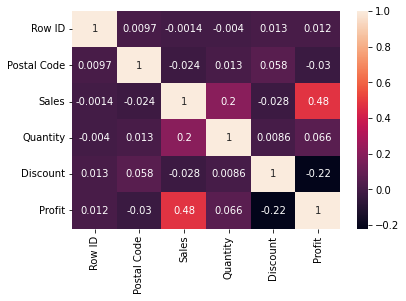

In [ ]:
#Menampilkan relasi kolom
sns.heatmap(store.corr(), annot =True)

In [ ]:
#Membuat conditional statement pada kolom profit
p = store['Profit'].values.astype('O')

for j in range(len(p)):
    if p[j] > 0:
        p[j] = 'Gain'
    elif p[j] < 0:
        p[j] = 'Loss'
    else:
        p[j] = 'Nil'

#### **Column Profit**

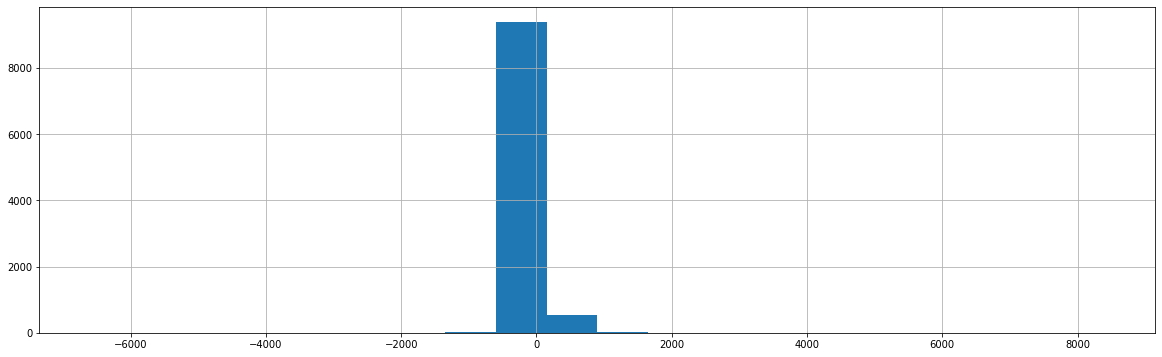

In [ ]:
#Menampilkan diagram jumlah pada kolom profit
n_bins = 20
plt.figure(figsize = (20, 6))
store['Profit'].hist(bins = n_bins)

In [ ]:
#Menampilkan Mean, Median, Maximum & Minimum kolom Profit
print("Mean Profit:", round(store['Profit'].mean()))

print("Median Profit:", round(store['Profit'].median()))

print("Highest Profit:", round(store['Profit'].max()))

print("Lowest Profit:", round(store['Profit'].min()))

Mean Profit: 29
Median Profit: 9
Highest Profit: 8400
Lowest Profit: -6600


In [ ]:
#Menampilkan 5 nilai tertinggi kolom profit
store['Profit'].sort_values(ascending = False)[:5]

6826    8399.9760
8153    6719.9808
4190    5039.9856
9039    4946.3700
4098    4630.4755
Name: Profit, dtype: float64

In [ ]:
#Menampilkan 5 nilai terendah kolom profit
store['Profit'].sort_values()[:5]

7772   -6599.9780
683    -3839.9904
9774   -3701.8928
3011   -3399.9800
4991   -2929.4845
Name: Profit, dtype: float64

#### **Menampilkan kolom yang termasuk Categorical**

Text(0.5, 1.0, 'Category')

<Figure size 432x288 with 0 Axes>

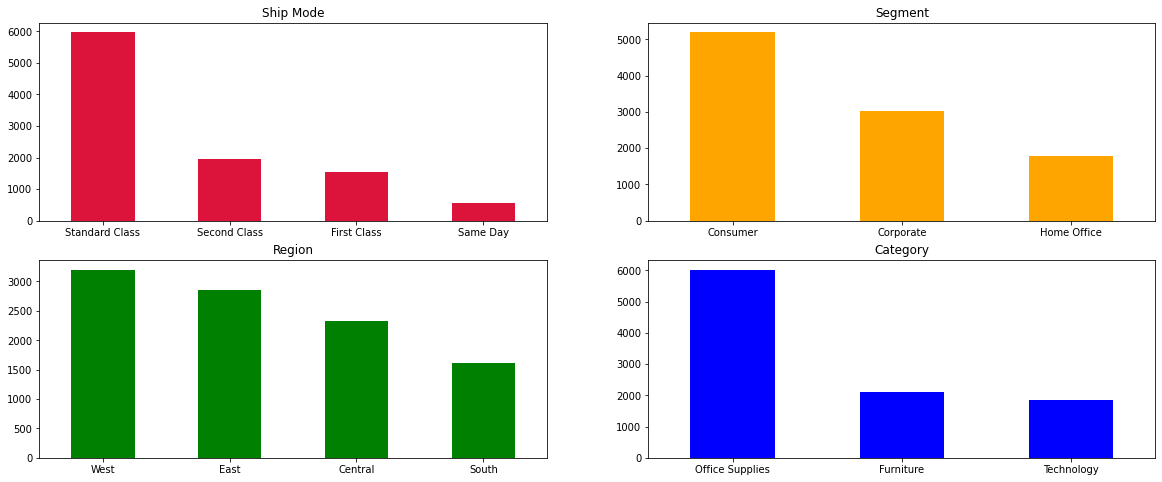

In [ ]:
plt.figure(1)
plt.figure(figsize=(20,8))
# Column (Ship Mode)
plt.subplot(221)
store['Ship Mode'].value_counts().plot(kind='bar',color='crimson',rot=0)
plt.title('Ship Mode')
# Column (Segment)
plt.subplot(222)
store['Segment'].value_counts().plot(kind='bar',color='orange',rot=0)
plt.title('Segment')
# Column (Region)
plt.subplot(223)
store['Region'].value_counts().plot(kind='bar',color='green',rot=0)
plt.title('Region')
# Column (Category)
plt.subplot(224)
store['Category'].value_counts().plot(kind='bar',color='blue',rot=0)
plt.title('Category')


**Plot di atas menggambarkan**
* Pengiriman melalui Kelas Standar paling banyak digunakan.
* Consumer paling banyak membeli produk
* Wilayah Barat memiliki lebih banyak Pelanggan daripada wilayah lain.
* Office Supplies adalah produk yang banyak dipesan.

Text(0.5, 1.0, 'Sub-Category')

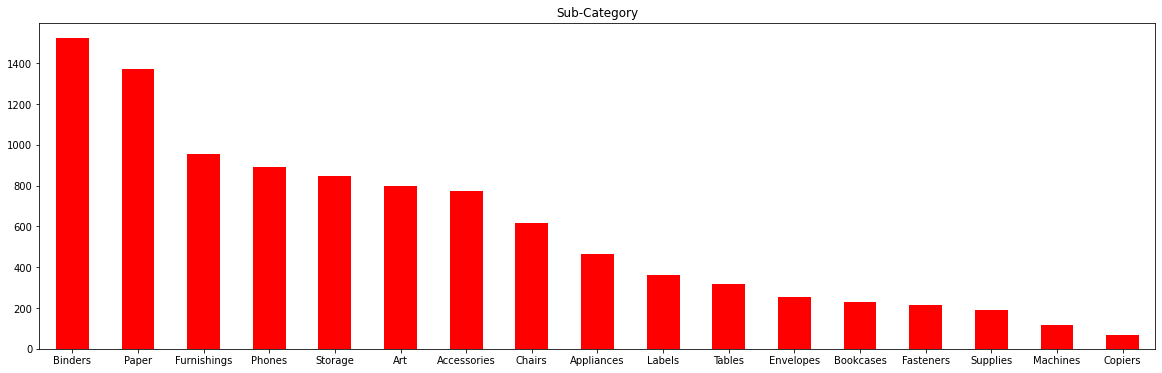

In [ ]:
# Column (Sub-Category)
plt.figure(figsize=(20,6))
store['Sub-Category'].value_counts().plot(kind='bar',color='red',rot=0)
plt.title('Sub-Category')

Sub-category yang banyak dipesan adalah Binders

#### **Menampilkan kolom yang termasuk Numerical**

<Figure size 432x288 with 0 Axes>

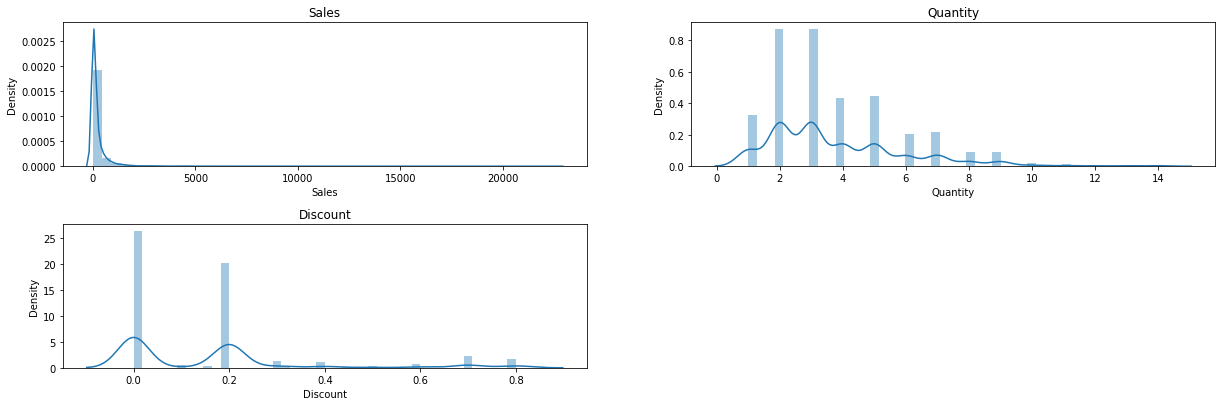

In [ ]:
plt.figure(1)
plt.figure(figsize=(20,6))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
# Column (Sales)
plt.subplot(221)
sns.distplot(store['Sales'])
plt.title('Sales')
# Column (Quantity)
plt.subplot(222)
sns.distplot(store['Quantity'])
plt.title('Quantity')
# Column (Discount)
plt.subplot(223)
sns.distplot(store['Discount'])
plt.title('Discount')
plt.show()

#### **Membandingkan Target Column dan Categorical Column**

Text(0.5, 1.0, 'Category vs Profit')

<Figure size 432x288 with 0 Axes>

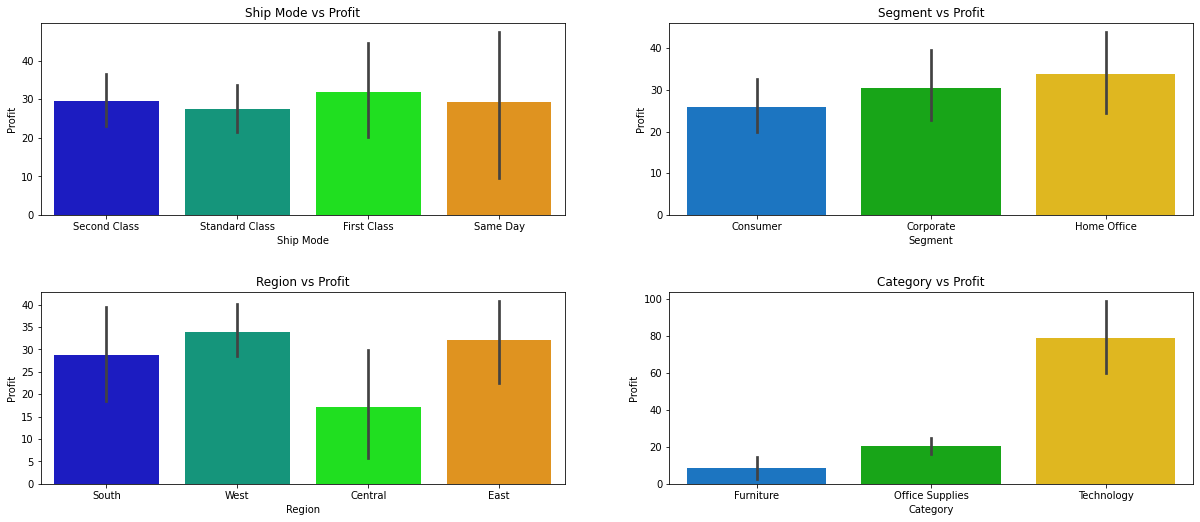

In [ ]:
plt.figure(1)
plt.figure(figsize = (20, 8))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
# Column (Ship Mode vs Profit)
plt.subplot(221)
sns.barplot(x = store['Ship Mode'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Ship Mode vs Profit')
# Column (Segment vs Profit)
plt.subplot(222)
sns.barplot(x = store['Segment'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Segment vs Profit')
# Column (Region vs Profit)
plt.subplot(223)
sns.barplot(x = store['Region'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Region vs Profit')
# Column (Category vs Profit)
plt.subplot(224)
sns.barplot(x = store['Category'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Category vs Profit')

**Insights from above plots**
* First Class shipping mode has marginly high profit than other shipping modes.
* Customers of Home Office types generate more profit.
* Profit is more in western region.
* Technology product category has high profit.

Text(0.5, 1.0, 'Sub-Category')

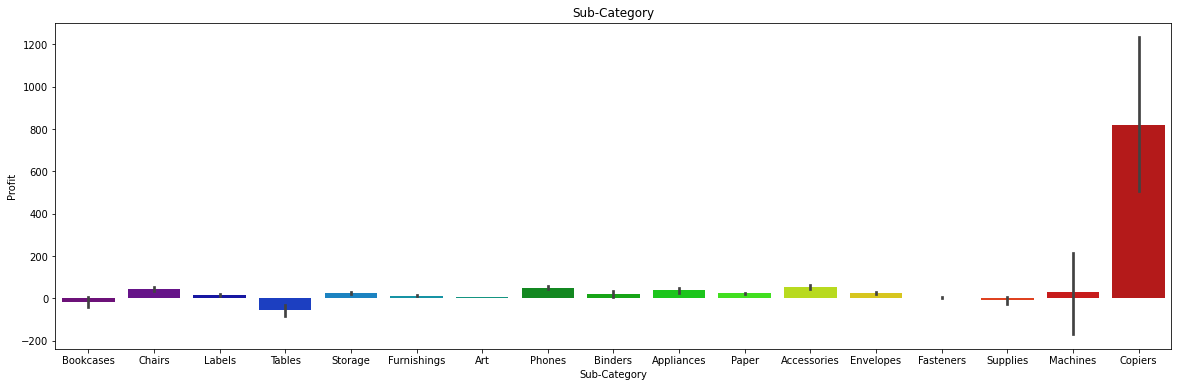

In [ ]:
# Column (Sub-Category vs Profit)
plt.figure(figsize=(20,6))
sns.barplot(x = store['Sub-Category'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Sub-Category')

#### **Membandingkan Target Column dan Numerical Column**

Text(0, 0.5, 'Profit')

<Figure size 432x288 with 0 Axes>

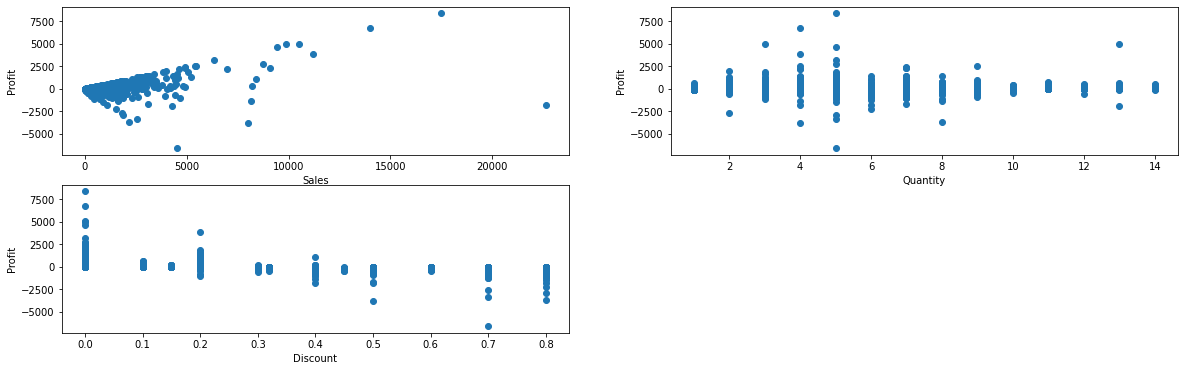

In [ ]:
plt.figure(1)
plt.figure(figsize = (20, 6))
# Column (Sales vs Profit)
plt.subplot(221)
plt.ticklabel_format(style = 'plain')
plt.scatter(store['Sales'], store['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
# Column (Quantity vs Profit)
plt.subplot(222)
plt.ticklabel_format(style = 'plain')
plt.scatter(store['Quantity'], store['Profit'])
plt.xlabel('Quantity')
plt.ylabel('Profit')
# Column (Discount vs Profit)
plt.subplot(223)
plt.ticklabel_format(style = 'plain')
plt.scatter(store['Discount'], store['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')

### Menyikirkan Outliner dengan menggunakan boxplot

In [ ]:
ot_store = store[['Sales','Quantity','Discount','Profit']]
ot_store.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [ ]:
fitted_data1, fitted_lambda = stats.boxcox(ot_store['Sales'])
store['Sales']=fitted_data1
fitted_data2, fitted_lambda = stats.boxcox(ot_store['Quantity'])
store['Quantity']=fitted_data2

<Figure size 432x288 with 0 Axes>

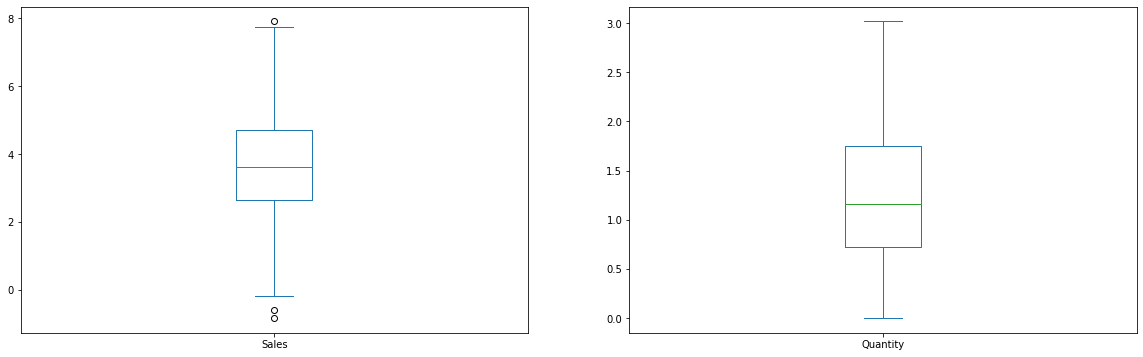

In [ ]:
plt.figure(1)
plt.figure(figsize = (20, 6))
plt.subplot(121)
store['Sales'].plot(kind='box')
plt.subplot(122)
store['Quantity'].plot(kind='box')

## **Model Klasifikasi**

#### **Kolom target yaitu Output_Profit yang dijadikan sebagai model klasifikasi**

In [ ]:
#Menampilkan jumlah pembagian kolom profit
unique, counts = np.unique(p, return_counts=True)
dict(zip(unique, counts))

{'Gain': 8058, 'Loss': 1871, 'Nil': 65}

In [ ]:
store['Output_Profit']=p

In [ ]:
store = store.drop(['Profit'],axis=1)

In [ ]:
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Output_Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,4.866793,0.717567,0.00,Gain
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",5.627292,1.160800,0.00,Gain
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2.511953,0.717567,0.00,Gain
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5.819876,1.745231,0.45,Loss
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2.880434,0.717567,0.20,Gain


In [ ]:
x = store

In [ ]:
#Mengganti kolom menjadi numerik
x1 = x.select_dtypes('O')

for col in x1.columns:
    lb = LabelEncoder()
    x[col] = lb.fit_transform(x1[col].values)
x.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Output_Profit
0,1,2500,304,219,2,143,166,0,0,194,...,42420,2,12,0,4,386,4.866793,0.717567,0.00,0
1,2,2500,304,219,2,143,166,0,0,194,...,42420,2,55,0,5,839,5.627292,1.160800,0.00,0
2,3,2296,835,906,2,237,201,1,0,266,...,90036,3,946,1,10,1433,2.511953,0.717567,0.00,0
3,4,4372,93,128,3,705,687,0,0,153,...,33311,2,319,0,16,366,5.819876,1.745231,0.45,1
4,5,4372,93,128,3,705,687,0,0,153,...,33311,2,1316,1,14,573,2.880434,0.717567,0.20,0


In [ ]:
#Melakukan split data
x = store.drop(['Output_Profit'],axis=1)
y = store['Output_Profit']
x_train, x_test, y_train, y_test = train_test_split(x, y)

### **Naive Bayes Classifier**

######Melakukan Data Training

In [ ]:
x_train.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
3278,3279,37,697,755,2,307,311,1,0,4,44,22304,2,1214,1,12,1746,2.406100,0.717567,0.0
1148,1149,973,694,737,1,554,554,0,0,242,20,48911,0,770,1,3,60,2.392394,0.717567,0.0
4705,4706,2604,744,795,0,26,59,0,0,506,5,6708,1,979,1,10,229,2.511953,0.717567,0.0
6735,6736,2057,616,677,3,115,111,0,0,438,3,94122,3,472,1,1,26,4.220359,1.160800,0.0
9713,9714,183,290,213,3,495,488,0,0,374,36,19143,1,1486,2,0,1459,3.581893,1.745231,0.2


In [ ]:
#Menghitung jumlah kolom x train
x_train.shape

(7495, 20)

In [ ]:
y_train.head(5)

3278    0
1148    0
4705    0
6735    0
9713    1
Name: Output_Profit, dtype: int64

In [ ]:
#Menghitung jumlah kolom y train
y_train.shape

(7495,)

In [ ]:
x_test.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
9179,9180,3930,1121,1114,3,386,365,0,0,517,3,92683,3,1768,2,13,1291,5.603158,1.160800,0.2
911,912,3556,1173,1325,3,75,88,2,0,215,20,49201,0,1403,1,14,643,5.090243,0.717567,0.0
7781,7782,1222,606,546,3,289,285,0,0,80,11,60623,0,744,1,3,263,2.037790,1.160800,0.8
9588,9589,3027,978,1066,3,63,49,0,0,518,11,60090,0,481,1,2,888,4.272582,1.486283,0.2
4962,4963,665,602,643,0,4,0,0,0,452,45,98103,3,517,1,2,1138,2.690249,1.160800,0.0


In [ ]:
#Menghitung jumlah kolom x test
x_test.shape

(2499, 20)

In [ ]:
#Masukan model naive bayes
gnb = GaussianNB()

gnb.fit(x_train, y_train)

GaussianNB()

######Melakukan Prediksi

In [ ]:
y_pred = gnb.predict(x_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Menampilkan hasil skor akurasi model
print('Model accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.84


Di sini, y_test adalah label kelas sebenarnya dan y_pred adalah label kelas yang diprediksi dalam set pengujian.

In [ ]:
#Membandingkan accuracy dari train-set and test-set

y_pred_train = gnb.predict(x_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Menampilkan perbandingan akurasi
print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.8316
Test set score: 0.8391


######Menghitung Probabilitas

In [ ]:
y_pred_prob = gnb.predict_proba(x_test)

y_pred_prob

array([[9.71363955e-01, 2.26592179e-02, 5.97682728e-03],
       [8.46247045e-01, 1.46674791e-01, 7.07816354e-03],
       [6.40792744e-01, 3.58575896e-01, 6.31359803e-04],
       ...,
       [5.16220088e-01, 4.81661148e-01, 2.11876410e-03],
       [9.63279419e-01, 3.42643490e-02, 2.45623199e-03],
       [9.55711706e-01, 4.02705209e-02, 4.01777353e-03]])

### **Random Forest Classifier Model**

In [ ]:
cm_rfc = Pipeline([('std_scaler', StandardScaler()),('rfc_classifier',RandomForestClassifier(n_estimators=150,max_depth=7,random_state=5))])

In [ ]:
cm_rfc.fit(x_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rfc_classifier',
                 RandomForestClassifier(max_depth=7, n_estimators=150,
                                        random_state=5))])

In [ ]:
cm_rfc.score(x_train,y_train), cm_rfc.score(x_test,y_test)

(0.9399599733155437, 0.9391756702681072)

## **Conclusion**

In [ ]:
#Membuat kolom perbandingan
models = ['Naive Bayes','Random Forest']
conclusion = pd.DataFrame(models,columns=['Models'])

In [ ]:
m = [gnb,cm_rfc]
train = []
test = []
for i in m:
    train.append(i.score(x_train,y_train))
    test.append(i.score(x_test,y_test))

In [ ]:
conclusion['Train_score']=train
conclusion['Test_score']=test

In [ ]:
#Menampilkan perbandingan hasil akurasi dari model naive bayes dan random forest
conclusion.style.highlight_max()

,Models,Train_score,Test_score
0,Naive Bayes,0.831621,0.839136
1,Random Forest,0.939960,0.939176
